In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


# Compute Individuation Scores for Online Forum Context

In [2]:
filename = 'onlineforum'

import pickle
with open('data/%s.pickle'%filename, 'rb') as handle:
    df=pickle.load(handle)

In [3]:
topics = ['Arts and Entertainment', 'How to Read Guitar Music',
       'Cars & Other Vehicles', 'How to Get Over the Fear of Driving',
       'Computers and Electronics', 'How to Type on a PDF',
       'Education and Communications', 'How to Find the Area of a Kite',
       'Family Life', 'How to Dress For a Funeral',
       'Finance and Business', 'How to Write a Business Case',
       'Food and Entertaining', 'How to Make an Egg Wash', 'Health',
       'How to Shrink Fibroids', 'Hobbies and Crafts',
       'How to Make Slime', 'Holidays and Traditions',
       'How to Say Happy Birthday', 
           'Home and Garden',
       'How to Get Rid of Ants in the House', 'Personal Care and Style',
       'How to Style Naturally Curly Hair', 'Pets and Animals',
       'How to Care for Dogs', 'Philosophy and Religion',
       'How to Create Your Own Birth Chart', 'Relationships',
       'How to Know if You Love Someone', 
          'American Socialism',
       'whether the U.S. should become socialist', 'Churches & Taxes',
       'whether churches (including mosques, synagogues, etc.) should remain tax-exempt',
       'Reparations for Slavery',
       'whether the federal government should pay reparations to the descendants of slaves',
       'Historic Statue Removal',
       'whether historic statues should be taken down',
       'Medical Marijuana', 'whether medical marijuana should be legal',
       'Electoral College',
       'whether the United States should use the Electoral College in presidential elections',
       'Minimum Wage',
       'whether the federal minimum wage should be increased',
       'Universal Basic Income (UBI)',
       'whether the United States should implement a universal basic income',
       'Paying College Athletes',
       'whether colleges and universities should pay college athletes',
       'Illegal Immigration',
       'whether the U.S. government should provide a path to citizenship for undocumented immigrants',
       'Abortion', 'whether abortion should be legal',
       'OTC Birth Control Pills',
       'whether birth control pills should be available over-the-counter (OTC)',
          'Golf',
       'whether golf is a sport and golfers are athletes', 'GMOs',
       'whether genetically modified organisms (GMOs) should be grown',
       'Saturday Halloween',
       'whether Halloween should be moved permanently to Saturday','comment']
topic_order = []
for i,t in enumerate(topics):
    if i % 2 == 0 and t!='comment':
        topic_order.append(t)
for i,t in enumerate(topics):
    if i % 2 == 1:
        topic_order.append(t)
# topic_order

evens = [ topics[i] for i in range(len(topics)) if i%2==0] #general topics
odds =[ topics[i] for i in range(len(topics)) if i%2==1]  #specific topics
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 30})

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score

import matplotlib.pyplot as plt


In [5]:
responses = df
plt.figure(figsize=(10,5))
groups = {'all':topics}

alls={}
for grp_name, grp_list in groups.items():
    alls[grp_name] = {}
    print(grp_name)
    for p in responses.persona.unique():
        
        if p!= 'person' and '60' not in p:
            f1s=[]
            accs=[]
            for t in responses.topic.unique():
                if t in grp_list:

                        inds = responses.loc[(responses['topic']==t)&(responses['persona'].isin([p,'person']))].index
                        X_train, X_test, y_train, y_test = train_test_split(
                            list(responses['embeddings'][inds]), responses.persona.astype("category").cat.codes[inds], 
                            test_size=0.2, random_state=42)
                        clf = RandomForestClassifier(random_state=0)
                        clf.fit(X_train, y_train)
                        y_pred = clf.predict(X_test)
                        f1 = f1_score(y_test, y_pred, average='macro')
                        f1s.append(f1_score(y_test, y_pred, average='macro'))
                        accs.append(accuracy_score(y_test, y_pred))
                        if accuracy_score(y_test, y_pred) < 0.5:
                            print("Less than 50%")
                            print(t)
                            print(p)
            alls[grp_name][p]=(f1s,accs)

all
Less than 50%
How to Make an Egg Wash
white person
Less than 50%
Food and Entertaining
woman
Less than 50%
whether churches (including mosques, synagogues, etc.) should remain tax-exempt
woman
Less than 50%
whether medical marijuana should be legal
man


<Figure size 720x360 with 0 Axes>

In [6]:
pers = ['20-year-old person', '40-year-old person','80-year-old person', 
       'conservative person', 'liberal person', 'moderate person',
       'white person', 'Black person', 'Asian person', 'Hispanic person',
       'Middle-Eastern person', 'man','nonbinary person','woman']

# Plot Individuation Scores

[0.012693508231423895, 0.011728242260422355, 0.0066219666734894265, 0.009401959396198999, 0.011397950042831954, 0.0082648709733966, 0.012130465668541705, 0.010843785994476109, 0.009531847498237855, 0.008215917370072823, 0.008522597643535523, 0.010418254773625926, 0.007531283913500239, 0.010831001904583915]


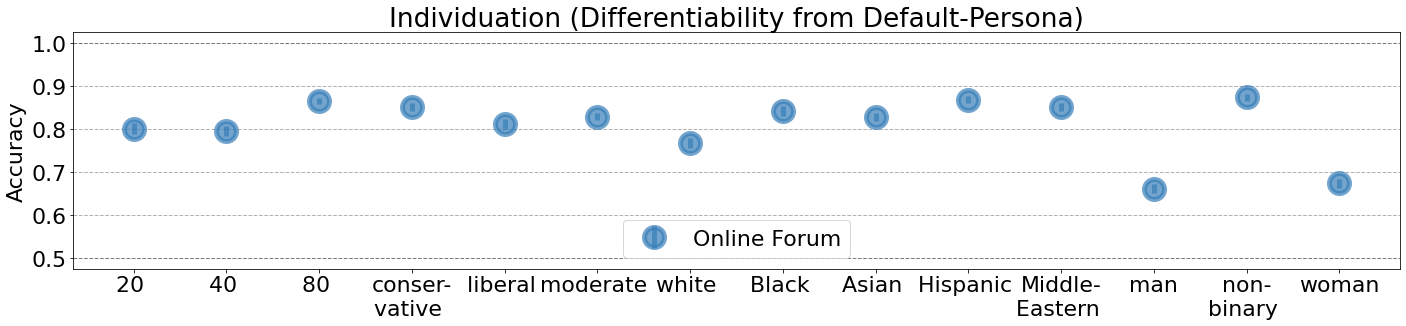

In [12]:
import scipy
CB = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
group_colors = {'Wikihow general':CB[0],'ProCon general':CB[0],'WikiHow specific':CB[1],'ProCon specific':CB[1]}

plt.rcParams["figure.figsize"] = (20,5)
plt.rcParams.update({'font.size': 22})
groups = {'all':topic_order}
group_colors = {'all':CB[0],'Wikihow general':'teal','ProCon general':'orange','WikiHow specific':'teal','ProCon specific':'orange'}
group_m = {'all':'o','Wikihow general':'o','ProCon general':'o','WikiHow specific':'*','ProCon specific':'*'}

# meanlists = {}
for grp_name in groups.keys():
    meanlist=[]
    for p in pers:
        if p != 'person':
            if len(alls[grp_name][p][1])>0:
                meanlist.append(alls[grp_name][p][1])
        
    plt.errorbar(range(len(meanlist)), [np.mean(x) for x in meanlist],[scipy.stats.sem(x) for x in meanlist],elinewidth=5,color=group_colors[grp_name],marker=group_m[grp_name],
          ms=20, mew=5,label='Online Forum',linewidth=0,alpha=0.7)
    print([scipy.stats.sem(x) for x in meanlist])
plt.title('Individuation (Differentiability from Default-Persona)')
plt.ylabel('Accuracy')
# plt.ylim(0.4,1.2)
plt.axhline(y=0.5, linestyle='--', color='black', linewidth=1, alpha=0.3)
plt.axhline(y=1, linestyle='--', color='black', linewidth=1, alpha=0.3)
plt.yticks([0.5,0.6,0.7,0.8,0.9,1])
labs=[x.replace('person','') for x in pers]
labs=[x.replace('-year-old','') for x in labs]
labs=[x.replace('Middle-Eastern','Middle-\nEastern') for x in labs]
labs=[x.replace('conservative','conser-\nvative') for x in labs]
labs=[x.replace('nonbinary','non-\nbinary') for x in labs]


plt.xticks(range(len(meanlist)),labs,rotation=0,fontsize=22)

for i in np.arange(0.5,1.001,0.1):
    plt.axhline(y=i,linestyle='--', color='black', linewidth=1, alpha=0.3)
plt.legend(loc='lower center')

plt.tight_layout()

# Compute Individuation Scores for Interview Context

In [13]:
filename = 'interview'

with open('data/%s.pickle'%filename, 'rb') as handle:
    df=pickle.load(handle)

In [14]:
responses = df
groups = {'all':topics}

alls={}
for grp_name, grp_list in groups.items():
    alls[grp_name] = {}
    print(grp_name)
    for p in responses.persona.unique():
        
        if p!= 'person' and '60' not in p:
            f1s=[]
            accs=[]
            for t in responses.topic.unique():
                if t in grp_list:

                        inds = responses.loc[(responses['topic']==t)&(responses['persona'].isin([p,'person']))].index
                        X_train, X_test, y_train, y_test = train_test_split(
                            list(responses['embeddings'][inds]), responses.persona.astype("category").cat.codes[inds], 
                            test_size=0.2, random_state=42)
                        clf = RandomForestClassifier(random_state=0)
                        clf.fit(X_train, y_train)
                        y_pred = clf.predict(X_test)
                        f1 = f1_score(y_test, y_pred, average='macro')
                        f1s.append(f1_score(y_test, y_pred, average='macro'))
                        accs.append(accuracy_score(y_test, y_pred))
                        if accuracy_score(y_test, y_pred) < 0.5:
                            print("Less than 50%")
                            print(t)
                            print(p)
            alls[grp_name][p]=(f1s,accs)

all


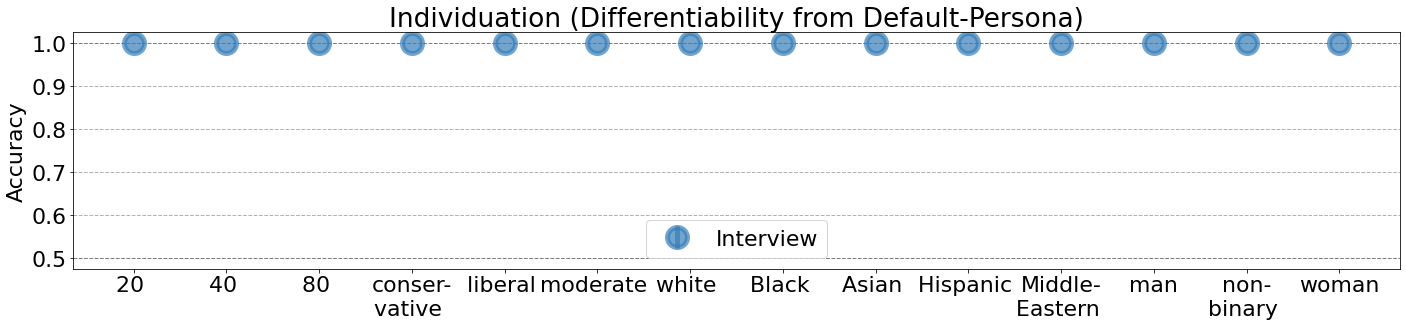

In [16]:
import scipy
CB = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
group_colors = {'Wikihow general':CB[0],'ProCon general':CB[0],'WikiHow specific':CB[1],'ProCon specific':CB[1]}

plt.rcParams["figure.figsize"] = (20,5)
plt.rcParams.update({'font.size': 22})
groups = {'all':topic_order}
group_colors = {'all':CB[0],'Wikihow general':'teal','ProCon general':'orange','WikiHow specific':'teal','ProCon specific':'orange'}
group_m = {'all':'o','Wikihow general':'o','ProCon general':'o','WikiHow specific':'*','ProCon specific':'*'}

# meanlists = {}
for grp_name in groups.keys():
    meanlist=[]
    for p in pers:
        if p != 'person':
            if len(alls[grp_name][p][1])>0:
                meanlist.append(alls[grp_name][p][1])
        
    plt.errorbar(range(len(meanlist)), [np.mean(x) for x in meanlist],[scipy.stats.sem(x) for x in meanlist],elinewidth=5,color=group_colors[grp_name],marker=group_m[grp_name],
          ms=20, mew=5,label='Interview',linewidth=0,alpha=0.7)
plt.title('Individuation (Differentiability from Default-Persona)')
plt.ylabel('Accuracy')
# plt.ylim(0.4,1.2)
plt.axhline(y=0.5, linestyle='--', color='black', linewidth=1, alpha=0.3)
plt.axhline(y=1, linestyle='--', color='black', linewidth=1, alpha=0.3)
plt.yticks([0.5,0.6,0.7,0.8,0.9,1])
labs=[x.replace('person','') for x in pers]
labs=[x.replace('-year-old','') for x in labs]
labs=[x.replace('Middle-Eastern','Middle-\nEastern') for x in labs]
labs=[x.replace('conservative','conser-\nvative') for x in labs]
labs=[x.replace('nonbinary','non-\nbinary') for x in labs]


plt.xticks(range(len(meanlist)),labs,rotation=0,fontsize=22)
for i in np.arange(0.5,1.001,0.1):
    plt.axhline(y=i,linestyle='--', color='black', linewidth=1, alpha=0.3)
plt.legend(loc='lower center')

plt.tight_layout()